In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from math import pi

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [2]:
def execute_circuit(qc):
    # Use Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

    # Grab the results from the job.
    result_sim = job_sim.result()

    counts = result_sim.get_counts(qc)

    return counts

In [3]:
def swap_reg(qc):
    for qubit in range(qc.num_qubits // 2):
        qc.swap(qubit, qc.num_qubits - qubit - 1)
    
def set_reg(qc, _input):
    if (_input.bit_length() > qc.num_qubits):
        print("Insufficient qubits")
        return False
    
    for i in range(0, _input.bit_length()):
        if ((1 << i) & _input):
            qc.x(qc.num_qubits - i -1)
    
    return True

In [4]:
def qft_cct(qc):
    i = 0
    n = qc.num_qubits
    
    while(n):
        qc.h(i)
        n -= 1
        i += 1
        
        for qubit in range(n):
            qc.cp(pi/2**(qubit + 1), qubit + i, i -1)
            
        qc.barrier()


In [5]:
def qft_fwd(qc, _input):
    if (True == set_reg(qc, _input)):
        qft_cct(qc)
        swap_reg(qc)
        return True
    return False

In [6]:
def qft_inv(qc):
    for i in range(qc.num_qubits -1, -1, -1):
        for qubit in range(i, qc.num_qubits -1):
            qc.cp(- pi/2**(qubit + 1 - i), qubit + 1, i)
        qc.h(i)
        qc.barrier()

In [57]:
number = 15
numberOfQubits = 4
shots = 1024

q = QuantumRegister(numberOfQubits, 'q')
c = ClassicalRegister(numberOfQubits, 'c')
qc = QuantumCircuit(q, c)
qft_fwd(qc, number)
swap_reg(qc)
qft_inv(qc)
qc.measure_all()

In [58]:
execute_circuit(qc)

{'1111 0000': 1024}

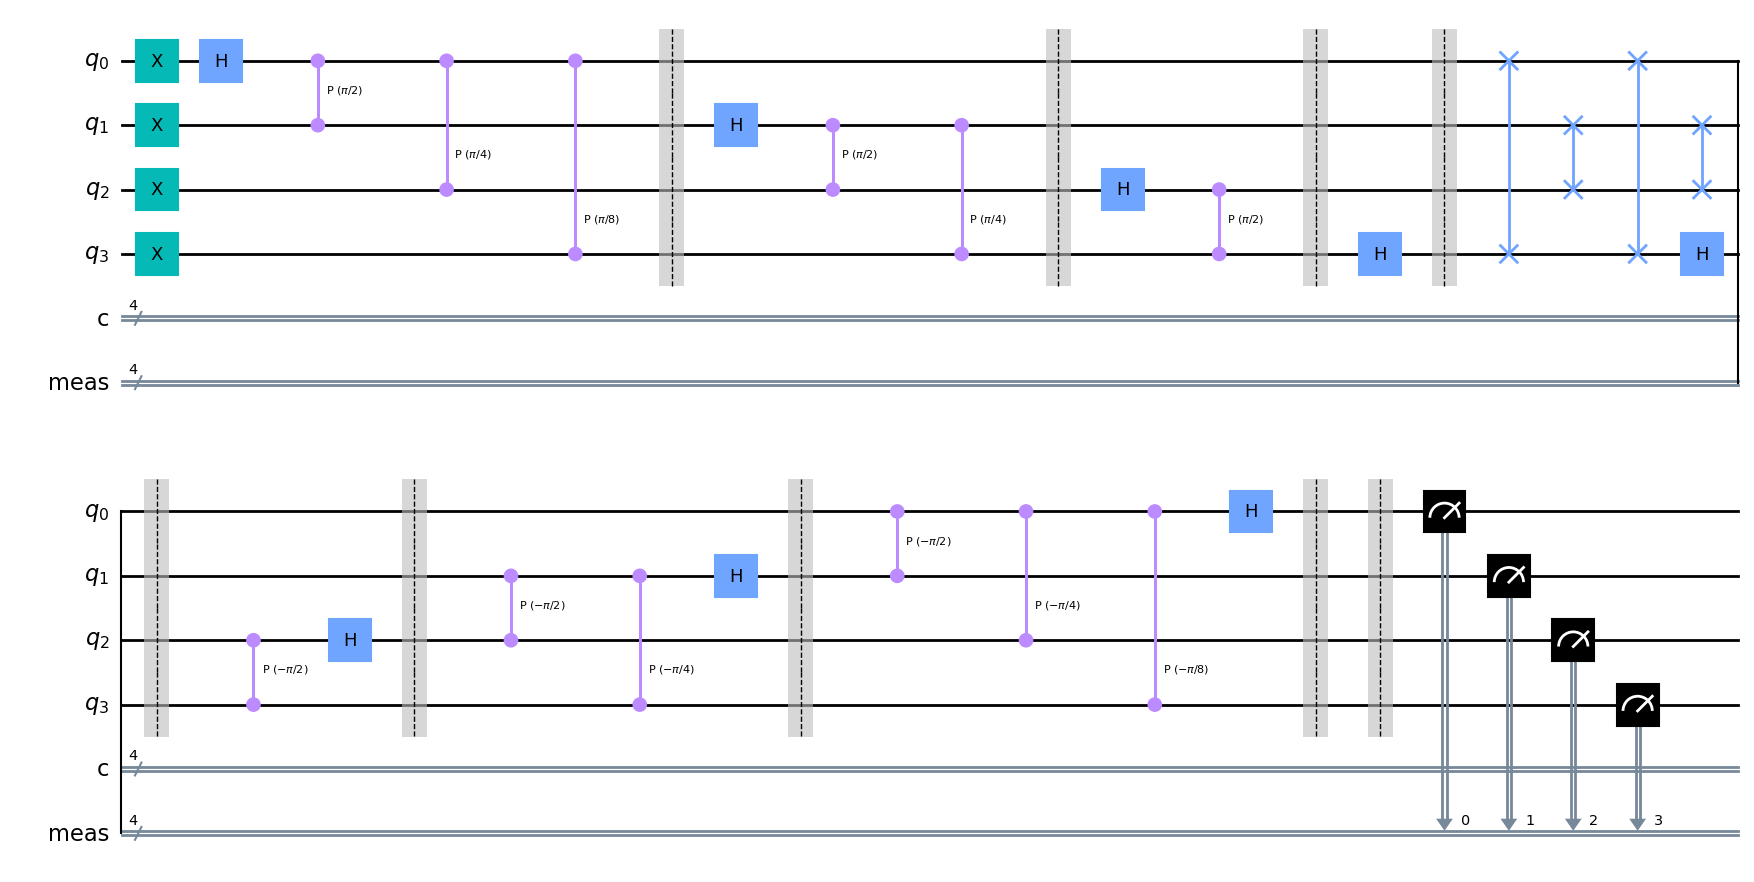

In [59]:
qc.draw()